In [ ]:
!pip install faker

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import random
import faker
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [11]:
fake = faker.Faker("es_ES")

generos = ["Masculino", "Femenino"]
estado_civil = ["Soltero", "Casado", "Divorciado", "Viudo"]
universidades = ["ESPOL", "Universidad Central del Ecuador", "PUCE", "Universidad de Cuenca",
                 "Universidad Técnica de Ambato", "Universidad Técnica del Norte", "Universidad Técnica Particular de Loja",
                 "Universidad Católica de Santiago de Guayaquil"]
carreras = ["Ingeniería en Sistemas", "Administración de Empresas", "Economía", "Contabilidad", "Derecho", "Psicología",
            "Medicina", "Arquitectura", "Ingeniería Civil", "Marketing"]
industrias = ["Tecnología", "Finanzas", "Salud", "Educación", "Retail", "Construcción", "Manufactura", "Turismo", "Transporte"]
empleos = ["Desarrollador de Software", "Gerente Financiero", "Analista de Datos", "Profesor Universitario", "Ingeniero Civil",
           "Médico General", "Arquitecto", "Contador Público", "Ejecutivo de Ventas", "Especialista en Marketing"]
tema_favorito = ["Innovación", "Inteligencia Artificial", "Finanzas Personales", "Sostenibilidad", "Emprendimiento",
                 "Ciencia de Datos", "Educación", "Desarrollo Personal", "Negocios Internacionales", "Ciberseguridad"]

data = []
num_registros = 5000  # filas a generar

for _ in range(num_registros):
    cedula = f"17{random.randint(1000000, 9999999)}"
    nombre = fake.name()
    edad = edad = max(18, int(np.random.normal(loc=22, scale=10)))  # promedio 22, desviación de 10
    genero = random.choice(generos)
    estado = random.choice(estado_civil)
    universidad = random.choice(universidades)
    carrera = random.choice(carreras)
    industria = random.choice(industrias)
    empleo_actual = random.choice(empleos)

    tiempo_empleo = abs(int(np.random.normal(loc=60, scale=30)))
    tiempo_empresa = min(tiempo_empleo, abs(int(np.random.normal(loc=48, scale=20))))
    duracion_promedio_empleos = abs(int(np.random.normal(loc=24, scale=12)))

    tiempo_actividad_laboral = abs(int(np.random.poisson(lam=10)))

    cantidad_cambios_laborales = abs(int(np.random.poisson(lam=3)))
    cantidad_conexiones = abs(int(np.random.exponential(scale=1000)))
    cantidad_recomendaciones = abs(int(np.random.poisson(lam=5)))
    cantidad_posts = abs(int(np.random.poisson(lam=20)))

    cantidad_certificaciones = abs(int(np.random.poisson(lam=3)))
    cantidad_idiomas = max(1, min(5, abs(int(np.random.normal(loc=2, scale=1)))))
    cantidad_seminarios = abs(int(np.random.poisson(lam=4)))

    tema_favorito = random.choice(tema_favorito)

    data.append([cedula, nombre, edad, genero, estado, universidad, carrera, industria, empleo_actual,
                 tiempo_empleo, tiempo_empresa, duracion_promedio_empleos, tiempo_actividad_laboral,
                 cantidad_cambios_laborales, cantidad_conexiones, cantidad_recomendaciones, cantidad_posts,
                 cantidad_certificaciones, cantidad_idiomas, cantidad_seminarios, tema_favorito])


df = pd.DataFrame(data, columns=[
    "cedula", "nombre", "edad", "genero", "estado_civil", "universidad", "carrera", "industria",
    "empleo_actual", "tiempo_empleo_meses", "tiempo_empresa_meses",
    "duracion_empleo_meses", "tiempo_actividad_laboral_anios",
    "cantidad_cambios_laborales", "cantidad_conexiones", "cantidad_recomendaciones", "cantidad_posts",
    "cantidad_certificaciones", "cantidad_idiomas", "cantidad_seminarios", "tema_favorito"
])

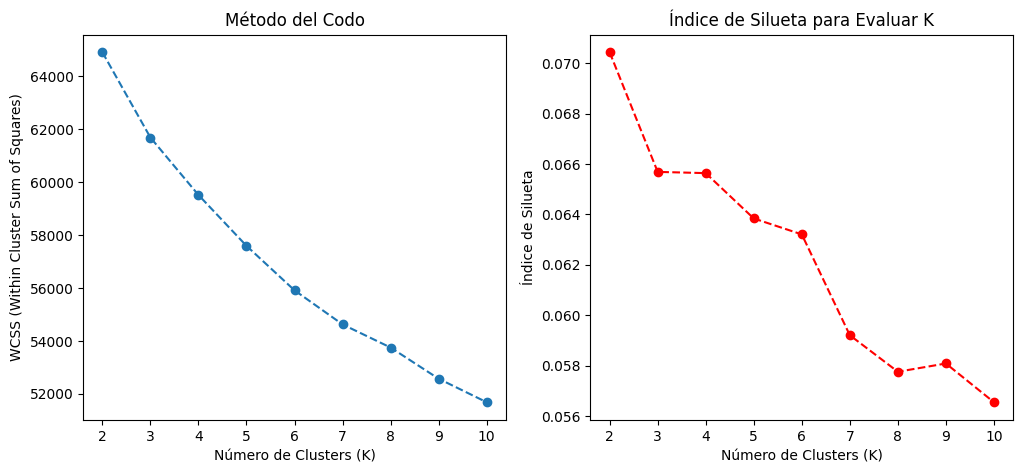

In [12]:
label_encoder = LabelEncoder()
df["genero"] = label_encoder.fit_transform(df["genero"])
df["estado_civil"] = label_encoder.fit_transform(df["estado_civil"])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.select_dtypes(include=['number']))

wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Método del Codo')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Índice de Silueta')
plt.title('Índice de Silueta para Evaluar K')

plt.show()


In [27]:
optimal_k = K_range[list(silhouette_scores).index(max(silhouette_scores))]

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(data_scaled)

# Separar características y etiquetas (excluyendo variables no numéricas)
X = data_scaled  # Datos escalados
y = df["Cluster"]  # Etiqueta de cluster asignada

# Dividir en 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo en datos de entrenamiento
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_train)

y_pred = kmeans.predict(X_test)

# Evaluar el modelo usando métricas de clustering
silhouette = silhouette_score(X_test, y_pred)
davies_bouldin = davies_bouldin_score(X_test, y_pred)
calinski_harabasz = calinski_harabasz_score(X_test, y_pred)

# kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# df["Cluster"] = kmeans.fit_predict(data_scaled)

cluster_labels = {
    0: "Muy Confiable (Profesional Estable)",
    1: "Confiable (Joven en Crecimiento)",
    2: "Moderado (Freelancer/Emprendedor)",
    3: "Riesgo Medio (Muchos Cambios Laborales)",
    4: "Riesgo Alto (Poca Experiencia)",
    5: "Muy Riesgoso (Baja Actividad y Redes)"
}

df["Perfil_Confianza"] = df["Cluster"].map(cluster_labels)

metrics = {
    "Índice de Silueta": silhouette,
    "Índice de Davies-Bouldin": davies_bouldin,
    "Índice de Calinski-Harabasz": calinski_harabasz
}

metrics

{'Índice de Silueta': 0.06854151404720438,
 'Índice de Davies-Bouldin': 3.5126036807856447,
 'Índice de Calinski-Harabasz': 76.75044690977184}

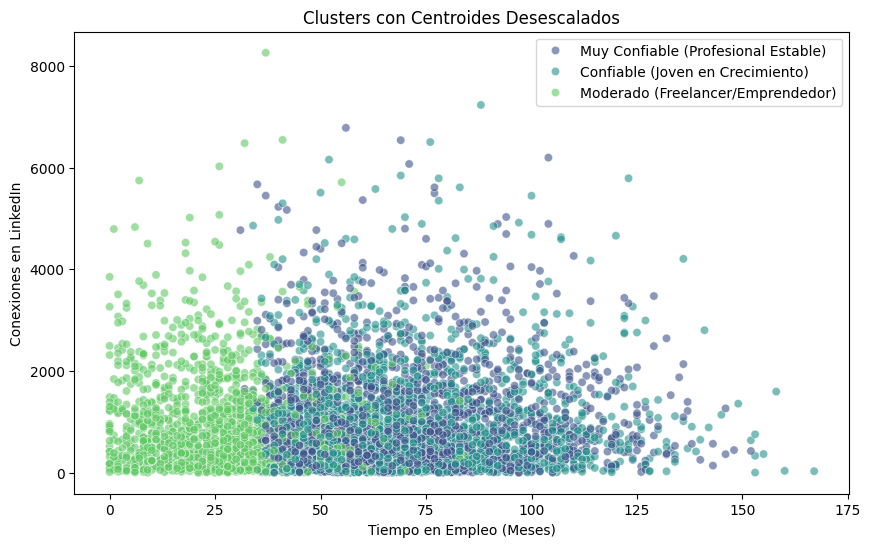

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df["tiempo_empleo_meses"],
    y=df["cantidad_conexiones"],
    hue=df["Perfil_Confianza"],
    palette="viridis",
    alpha=0.6
)

plt.xlabel("Tiempo en Empleo (Meses)")
plt.ylabel("Conexiones en LinkedIn")
plt.title("Clusters con Centroides Desescalados")
plt.legend()
plt.show()